In [ ]:
import pandas as pd
import numpy as np
from typing import List
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split


In [ ]:
pip install tensorflow

In [ ]:
pip install accelerate

     |████████████████████████████████| 79 kB 6.6 MB/s 


In [ ]:
pip install transformers

     |████████████████████████████████| 4.0 MB 8.7 MB/s 
     |████████████████████████████████| 77 kB 7.5 MB/s 
     |████████████████████████████████| 596 kB 57.8 MB/s 
     |████████████████████████████████| 6.6 MB 53.0 MB/s 
     |████████████████████████████████| 880 kB 52.1 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=0f3d18c86740d2317118bbb2020e263ca25836b7738c3b3ec18bfedf88fc8f35
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install transformers==4.12.2
!pip install farasapy==0.0.14
!pip install pyarabic==0.6.14
!git clone https://github.com/aub-mind/arabert
!pip install emoji==1.6.1
!pip install sentencepiece==0.1.96

     |████████████████████████████████| 3.1 MB 43.4 MB/s 
     |████████████████████████████████| 880 kB 81.4 MB/s 
     |████████████████████████████████| 77 kB 8.0 MB/s 
     |████████████████████████████████| 596 kB 49.0 MB/s 
     |████████████████████████████████| 3.3 MB 53.7 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=ceb571f2882a563ff3cfa3baf25034898cfafd7953325e358e4f89d092069e2c
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 126 kB 34.4 MB/s 
Cloning into 'arabert'...
remote: Enumerating objects: 564, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 564 (delta 25), reused 22 (delta 22

### Importing necessary libraries


In [ ]:
import torch
from torch.utils.data import DataLoader

# Accelerate library for distributed training
from accelerate import Accelerator, DistributedType

# Hugging Face datasets and metrics
from datasets import load_dataset, load_metric

# Hugging Face Transformers library
from transformers import (
    AdamW,
    AutoModelForSequenceClassification,
    AutoTokenizer,
    get_linear_schedule_with_warmup,
    set_seed,
)
# tqdm for progress bars
from tqdm.auto import tqdm
# Alias for 'datasets' library to avoid naming conflicts
import datasets
# Alias for 'transformers' library to avoid naming conflicts
import transformers
# Ensure reproducibility by setting a seed
set_seed(42)
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
import copy

from arabert.preprocess import ArabertPreprocessor
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)
from torch.utils.data import DataLoader, Dataset
from transformers import (AutoConfig, AutoModelForSequenceClassification,
                          AutoTokenizer, BertTokenizer, Trainer,
                          TrainingArguments)
from transformers.data.processors.utils import InputFeatures

#### Checking GPU

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4
Sun May  8 15:57:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    11W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                            

In [ ]:
!pip install transformers==4.12.2
!pip install farasapy==0.0.14
!pip install pyarabic==0.6.14
!git clone https://github.com/aub-mind/arabert
!pip install emoji==1.6.1
!pip install sentencepiece==0.1.96

fatal: destination path 'arabert' already exists and is not an empty directory.


In [ ]:
Data =pd.read_csv("/content/drive/MyDrive/Untitled folder/Arabic_pre3.csv")

In [ ]:
Data.head(10)

,Unnamed: 0,Sentence,Label
0,329915,"مراكشتعددت , في ال+ آون +ة ال+ أخير +ة , جرائم...",0
1,76605,""" و+ بينما أضاف فرانسوا مول +ين , ال+ مدعي ال+...",0
2,92817,""" مصر لم تخسر نهائي "" كان "" منذ 88 عام +ا صدام...",0
3,120592,""" و+ أكد مسؤول رفيع في ال+ وكال +ة ال+ فضائي +...",1
4,71748,""" و+ قال +ت ال+ شرط +ة ال+ بريطاني +ة +ان عملي...",1
5,442020,2 في ال+ مائ +ة فقط من يضع +ن شكاي +ة و+ ال+ ا...,0
6,48269,و+ يضطر شباب ال+ حسيم +ة في كل موسم رياضي الي ...,1
7,30503,""" و+ توقع ال+ محامي عبد ال+ صادق ال+ بيشتاوي ف...",0
8,397608,علم +ا +ان ال+ لقاء انتهى ل+ مصلح +ة ال+ زائر ...,1
9,451523,""" محور ميثاق إصلاح منظوم +ة ال+ عدال +ة , و+ م...",0


In [ ]:
DATA_COLUMN = 'Sentence'
LABEL_COLUMN = 'Label'

Data = Data[['Sentence', 'Label']]
Data.columns = [DATA_COLUMN, LABEL_COLUMN]

In [ ]:
# select a model from the huggingface modelhub https://huggingface.co/models?language=ar
model_name = 'aubmindlab/bert-base-arabertv02-twitter' # we are going to use the twitter AraBERT since it has emojis and dialects

In [ ]:
class CustomDataset:
    def __init__(
        self,
        name: str,
        train: List[pd.DataFrame],
        test: List[pd.DataFrame],
        label_list: List[str],
    ):
        """Class to hold and structure datasets.

        Args:

        name (str): holds the name of the dataset so we can select it later
        train (List[pd.DataFrame]): holds training pandas dataframe with 2 columns ["text","label"]
        test (List[pd.DataFrame]): holds testing pandas dataframe with 2 columns ["text","label"]
        label_list (List[str]): holds the list  of labels
        """
        self.name = name
        self.train = train
        self.test = test
        self.label_list = label_list

In [ ]:
Data = Data[['Sentence',"Label"]]  
Data.columns = [DATA_COLUMN, LABEL_COLUMN]
print("Total length: ", len(Data))
print(Data[LABEL_COLUMN].value_counts())

label_list = list(Data[LABEL_COLUMN].unique())
print(label_list)

train_ArSAS, test_ArSAS = train_test_split(Data, test_size=0.10, random_state=42)
print("Training length: ", len(train_ArSAS))
print("Testing length: ", len(test_ArSAS))
Data1 = CustomDataset("ArSAS", train_ArSAS, test_ArSAS, label_list)

Total length:  486960
1    243635
0    243325
Name: Label, dtype: int64
[0, 1]
Training length:  438264
Testing length:  48696


### Initialize Arabert tokenizer


In [ ]:
arabic_prep = ArabertPreprocessor(model_name)

Data1.train[DATA_COLUMN] = Data1.train[DATA_COLUMN].apply(lambda x: arabic_prep.preprocess(x))
Data1.test[DATA_COLUMN] = Data1.test[DATA_COLUMN].apply(lambda x: arabic_prep.preprocess(x))  

In [ ]:
# Sanity check on the dataset
list(Data1.train[DATA_COLUMN][0:100])

In [ ]:
tok = AutoTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/476 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/733k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (606 > 512). Running this sequence through the model will result in indexing errors


Training Sentence Lengths: 


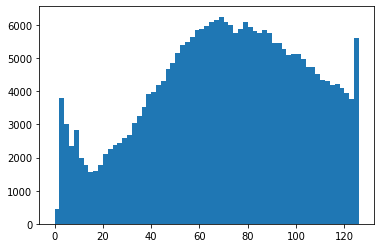

Testing Sentence Lengths: 


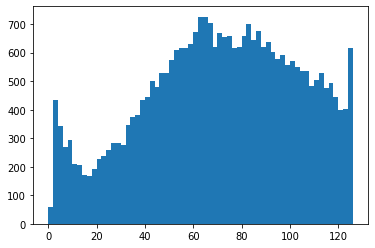

In [ ]:
print("Training Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in Data1.train[DATA_COLUMN].to_list()],bins=range(0,128,2))
plt.show()
print("Testing Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in Data1.test[DATA_COLUMN].to_list()],bins=range(0,128,2))
plt.show()

In [ ]:
#the maximum sequence length is set during training and is fixed for a given model architecture (e.g., 512 tokens for BERT base models).
max_len = 300

### Split Long Sequences:

In [ ]:
print("Truncated training sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in Data1.train[DATA_COLUMN].to_list()]))

print("Truncated testing sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in Data1.test[DATA_COLUMN].to_list()]))

Truncated training sequences:  42136
Truncated testing sequences:  4607


In [ ]:
class ClassificationDataset(Dataset):
    def __init__(self, text, target, model_name, max_len, label_map):
        # Call the constructor of the parent class
        super().__init__()

        """
        Args:
        text (List[str]): List of the training text
        target (List[str]): List of the training labels
        model_name (str): The model name for tokenizer initialization.
        max_len (int): Maximum sentence length
        label_map (Dict[str, int]): A dictionary that maps the class labels to integers
        """
        # Store input parameters as attributes
        self.text = text
        self.target = target
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.max_len = max_len
        self.label_map = label_map

    def __len__(self):
        # Return the total number of samples in the dataset
        return len(self.text)

    def __getitem__(self, item):
        # Retrieve the text and target label for the specified item
        text = str(self.text[item])

        # Additional text cleaning or processing steps can be added here

        # Tokenize the text and apply padding/truncation
        inputs = self.tokenizer(
            text,
            max_length=self.max_len,
            padding='max_length',
            truncation=True
        )

        # Return an InputFeatures object containing inputs and label
        return InputFeatures(inputs, label=self.label_map[self.target[item]])


## Labelling and spliting 

In [ ]:
# Create a label mapping dictionary where class labels are mapped to integers
label_map = {v: index for index, v in enumerate(Data1.label_list)}
print(label_map)

# Create training dataset using the ClassificationDataset class
train_dataset = ClassificationDataset(
    text=Data1.train[DATA_COLUMN].to_list(),  # Input text for training
    target=Data1.train[LABEL_COLUMN].to_list(),  # Corresponding labels for training
    model_name=model_name,  # Name of the model for tokenizer initialization
    max_len=max_len,  # Maximum sentence length
    label_map=label_map  # Label mapping dictionary
)

# Create test dataset using the ClassificationDataset class
test_dataset = ClassificationDataset(
    text=Data1.test[DATA_COLUMN].to_list(),  # Input text for testing
    target=Data1.test[LABEL_COLUMN].to_list(),  # Corresponding labels for testing
    model_name=model_name,  # Name of the model for tokenizer initialization
    max_len=max_len,  # Maximum sentence length
    label_map=label_map  # Label mapping dictionary
)


In [ ]:
#represent a single training example after tokenization and processing
print(next(iter(train_dataset)))


##### This function is responsible for initializing and returning a pretrained sequence classification model using the AutoModelForSequenceClassification class from the transformers library

In [ ]:
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, return_dict=True, num_labels=len(label_map))

In [ ]:
def compute_metrics(p):
    # Extract predicted labels
    preds = np.argmax(p.predictions, axis=1)
    
    # Ensure the lengths of predicted and true labels are the same
    assert len(preds) == len(p.label_ids)
    
    # Print classification report and confusion matrix
    print(classification_report(p.label_ids, preds))
    print(confusion_matrix(p.label_ids, preds))
    
    # Calculate macro F1 score and accuracy
    macro_f1 = f1_score(p.label_ids, preds, average='macro')
    acc = accuracy_score(p.label_ids, preds)
    
    # Return metrics as a dictionary
    return {
        'macro_f1': macro_f1,
        'accuracy': acc
    }

In [ ]:
def set_seed(seed=42):
    # Set seed for the random module
    random.seed(seed)
    
    # Set seed for NumPy
    np.random.seed(seed)
    
    # Set seed for the random number generator in PyTorch on the CPU
    torch.manual_seed(seed)
    
    # Set seed for the random number generator in PyTorch on the GPU
    torch.cuda.manual_seed(seed)
    
    # Set seed for all GPUs (if available)
    torch.cuda.manual_seed_all(seed)
    
    # Ensure deterministic behavior for CuDNN (CUDA Deep Neural Network library)
    torch.backends.cudnn.deterministic = True
    
    # Disable CuDNN benchmarking for reproducibility
    torch.backends.cudnn.benchmark = False

### Define the training arguments for the Trainer


In [ ]:
training_args = TrainingArguments(
    output_dir="./train",  # Output directory for the model checkpoints and predictions
    adam_epsilon=1e-8,  # Epsilon parameter for Adam optimizer
    learning_rate=2e-5,  # Learning rate for the optimizer
    fp16=False,  # Whether to use mixed-precision training (enable this when using V100 or T4 GPU)
    per_device_train_batch_size=16,  # Batch size per GPU for training (up to 64 on 16GB with max len of 128)
    per_device_eval_batch_size=128,  # Batch size per GPU for evaluation
    gradient_accumulation_steps=2,  # Use this to scale batch size without needing more memory
    num_train_epochs=2,  # Number of training epochs
    warmup_ratio=0,  # Ratio of warmup steps for learning rate scheduler
    do_eval=True,  # Perform evaluation during training
    evaluation_strategy='epoch',  # Evaluate after each epoch
    save_strategy='epoch',  # Save model checkpoints after each epoch
    load_best_model_at_end=True,  # Load the best model at the end based on the specified metric
    metric_for_best_model='macro_f1',  # Metric to use for determining the best model
    greater_is_better=True,  # Whether a higher value of the metric is considered better
    seed=25  # Seed for reproducibility
)

# Set the seed for random number generators
set_seed(training_args.seed)


In [ ]:
pip install transformers

### Initializ the Trainer object


In [ ]:
# Initialize the Trainer object
trainer = Trainer(
    model=model_init(),  # Initialize the model using the model_init() function
    args=training_args,  # Training arguments defined earlier
    train_dataset=train_dataset,  # Training dataset
    eval_dataset=test_dataset,  # Evaluation dataset
    compute_metrics=compute_metrics,  # Function for computing evaluation metrics
)


In [ ]:
#start the training
trainer.train()

***** Running training *****
  Num examples = 438264
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 2
  Total optimization steps = 27392


Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
1,0.259900,0.240780,0.899260,0.899314
2,0.203500,0.228960,0.908546,0.908658


***** Running Evaluation *****
  Num examples = 48696
  Batch size = 128


              precision    recall  f1-score   support

           0       0.92      0.88      0.90     24261
           1       0.88      0.92      0.90     24435

    accuracy                           0.90     48696
   macro avg       0.90      0.90      0.90     48696
weighted avg       0.90      0.90      0.90     48696

[[21333  2928]
 [ 1975 22460]]


Saving model checkpoint to ./train/checkpoint-13696
Configuration saved in ./train/checkpoint-13696/config.json
Model weights saved in ./train/checkpoint-13696/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 48696
  Batch size = 128


              precision    recall  f1-score   support

           0       0.94      0.88      0.91     24261
           1       0.88      0.94      0.91     24435

    accuracy                           0.91     48696
   macro avg       0.91      0.91      0.91     48696
weighted avg       0.91      0.91      0.91     48696

[[21271  2990]
 [ 1458 22977]]


Saving model checkpoint to ./train/checkpoint-27392
Configuration saved in ./train/checkpoint-27392/config.json
Model weights saved in ./train/checkpoint-27392/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./train/checkpoint-27392 (score: 0.908545547891568).


TrainOutput(global_step=27392, training_loss=0.26637621237852865, metrics={'train_runtime': 49317.8832, 'train_samples_per_second': 17.773, 'train_steps_per_second': 0.555, 'total_flos': 1.35131371366752e+17, 'train_loss': 0.26637621237852865, 'epoch': 2.0})

In [ ]:
label_map= {'fake': 0, 'real': 1}

In [ ]:
type(label_map.values)

In [ ]:
from re import X
import json
import numpy as np

# Defining a custom encoder function to handle NumPy types when converting to JSON
def np_encoder(x):
    if isinstance(x, np.generic):
        return x.item()
# Converting a Python dictionary (inv_label_map) to JSON, using the custom encoder for NumPy types
json.dumps(inv_label_map, default=np_encoder)

'{"fake": 0, "real": 1}'

In [ ]:
# Creating an inverse label mapping for interpretation and visualization
inv_label_map = {v: k for k, v in label_map.items()}

# Updating the model configuration with label mappings
trainer.model.config.label2id = label_map
trainer.model.config.id2label = inv_label_map

# Saving the trained model to the specified output directory
trainer.save_model("output_dir")

# Saving the tokenizer associated with the trained model
train_dataset.tokenizer.save_pretrained("output_dir")


Saving model checkpoint to output_dir
Configuration saved in output_dir/config.json


{'fake': 0, 'real': 1}


Model weights saved in output_dir/pytorch_model.bin
tokenizer config file saved in output_dir/tokenizer_config.json
Special tokens file saved in output_dir/special_tokens_map.json


('output_dir/tokenizer_config.json',
 'output_dir/special_tokens_map.json',
 'output_dir/vocab.txt',
 'output_dir/added_tokens.json',
 'output_dir/tokenizer.json')

In [ ]:
# Using the transformers library to create a text classification pipeline
from transformers import pipeline
# The pipeline is configured to run on the specified device (device=0 for GPU) and return all scores
pipe = pipeline("text-classification", model="/content/drive/MyDrive/Arabert_model", device=0, return_all_scores=True)

loading configuration file /content/drive/MyDrive/Arabert_model/config.json
Model config BertConfig {
  "_name_or_path": "aubmindlab/bert-base-arabertv02-twitter",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "fake",
    "1": "real"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "fake": 0,
    "real": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.12.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 64000
}

loading configuration file /content/drive/MyDr

In [ ]:
pipe('واذا كان البعض ما زال مقاوما للتغيير اليوم , فقد يصبح غدا اقل تقبلا وتسامحا .')

[[{'label': 'fake', 'score': 0.934684157371521},
  {'label': 'real', 'score': 0.06531587243080139}]]